In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
#from pandas import datetime
import datetime 

In [2]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%b-%y')

# Importing the dataset

In [3]:
time = pd.read_csv(r'''E:\PRACHI\Advance statistics\USCarrier_Traffic.csv''',
                   parse_dates=['Period'], index_col='Period',
                   date_parser=dateparse)
time.head()

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


In [4]:
time1 = time['Total']
time1.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

In [5]:
time1.tail()

Period
2019-10-01    88208131
2019-11-01    81010193
2019-12-01    90389583
2020-01-01    81537476
2020-02-01    74428909
Name: Total, dtype: int64

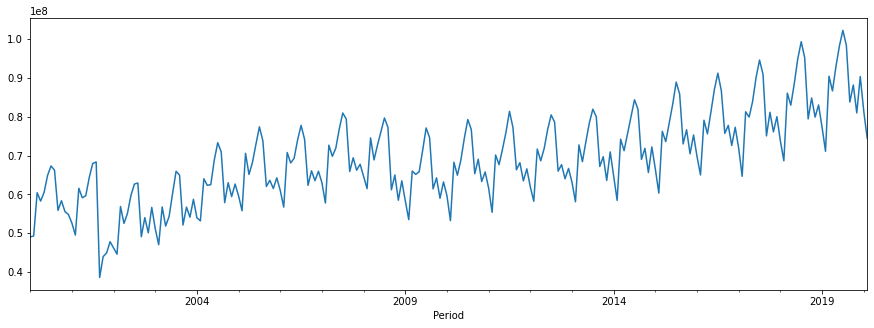

In [6]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

In [7]:
time.shape

(242, 1)

In [8]:
train=time1[0:216] 
test=time1[216:]


#splitting into train and test dataset - testset (2 years)

In [9]:
train.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

In [10]:
train.tail()

Period
2017-08-01    90980861
2017-09-01    75092288
2017-10-01    81168038
2017-11-01    76124199
2017-12-01    80037670
Name: Total, dtype: int64

In [11]:
test.head()

Period
2018-01-01    73795632
2018-02-01    68674042
2018-03-01    86103036
2018-04-01    83009398
2018-05-01    88525057
Name: Total, dtype: int64

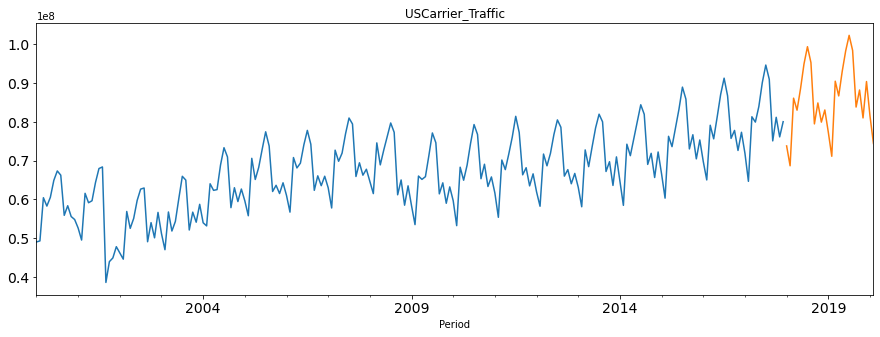

In [12]:
train.plot(figsize=(15,5), title= 'USCarrier_Traffic', fontsize=14)
test.plot(figsize=(15,5), title= 'USCarrier_Traffic', fontsize=14)
plt.show()

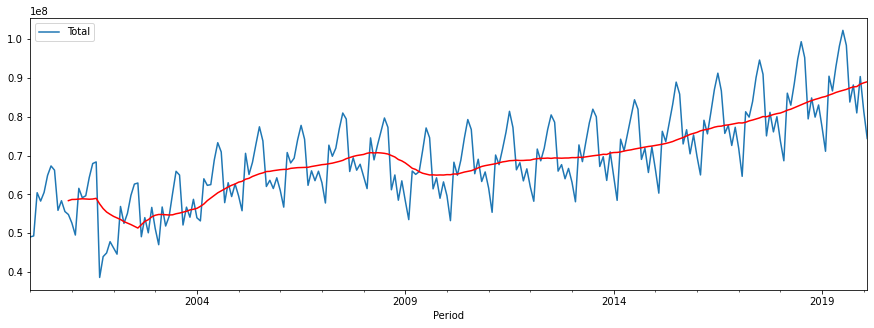

In [13]:
#moving_avg = pd.rolling_mean(time1,12)

moving_avg =time1.rolling(12).mean()
time.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()


# Cheking for moving_avg line

# Decomposing the model

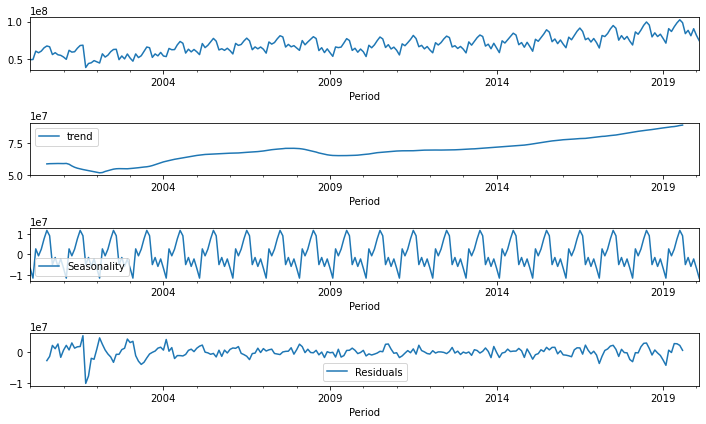

In [14]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [16]:
train = train.astype('float')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(26)
ses.summary()

#checking forecast with simple exponential(no trend/seasonality)

C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Total,No. Observations:,216
Model:,SimpleExpSmoothing,SSE,9422364075437820.000
Optimized:,True,AIC,6787.822
Trend:,None,BIC,6794.573
Seasonal:,None,AICC,6788.012
Seasonal Periods:,None,Date:,"Sun, 08 Aug 2021"
Box-Cox:,False,Time:,19:41:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7187209,alpha,True
initial_level,4.9045e+07,l.0,True


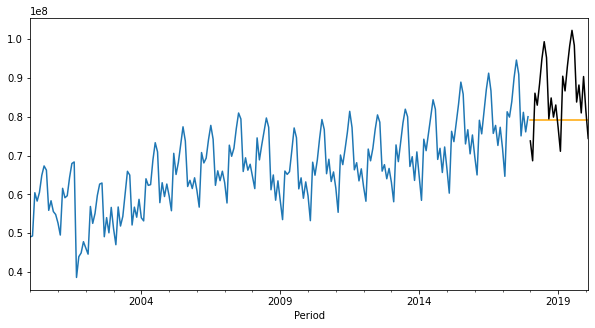

In [17]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [18]:
hes = ExponentialSmoothing(train, trend="add").fit()
hes.summary()

#checking forecast with holts-exponential(no seasonality)

C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Total,No. Observations:,216
Model:,ExponentialSmoothing,SSE,9421291640050348.000
Optimized:,True,AIC,6791.798
Trend:,Additive,BIC,6805.299
Seasonal:,None,AICC,6792.199
Seasonal Periods:,None,Date:,"Sun, 08 Aug 2021"
Box-Cox:,False,Time:,19:41:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7121429,alpha,True
smoothing_trend,0.0001,beta,True


In [19]:
hes1 = hes.forecast(26)

<AxesSubplot:xlabel='Period'>

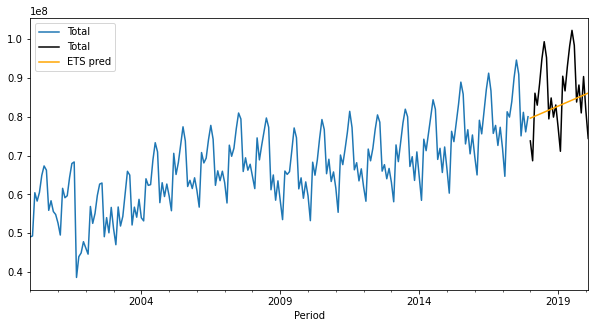

In [20]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [21]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='mul', seasonal="multiplicative").fit()
hwes.summary()

#checking forecast with holts-winter exponential(trend + seasonality)

C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Total,No. Observations:,216
Model:,ExponentialSmoothing,SSE,856895636909229.750
Optimized:,True,AIC,6297.957
Trend:,Multiplicative,BIC,6351.961
Seasonal:,Multiplicative,AICC,6301.429
Seasonal Periods:,12,Date:,"Sun, 08 Aug 2021"
Box-Cox:,False,Time:,19:41:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,True
smoothing_trend,0.0250000,beta,True


In [22]:
hwes1 = hwes.forecast(26)

<AxesSubplot:xlabel='Period'>

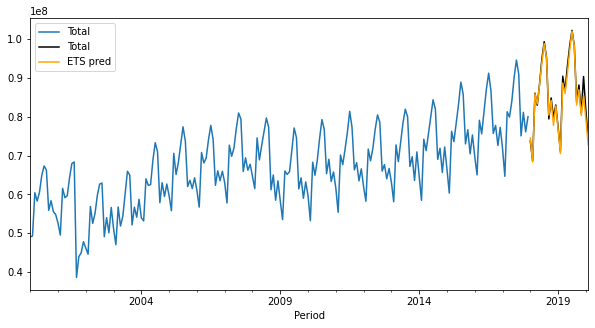

In [23]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

# Checking stationarity of dataset

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

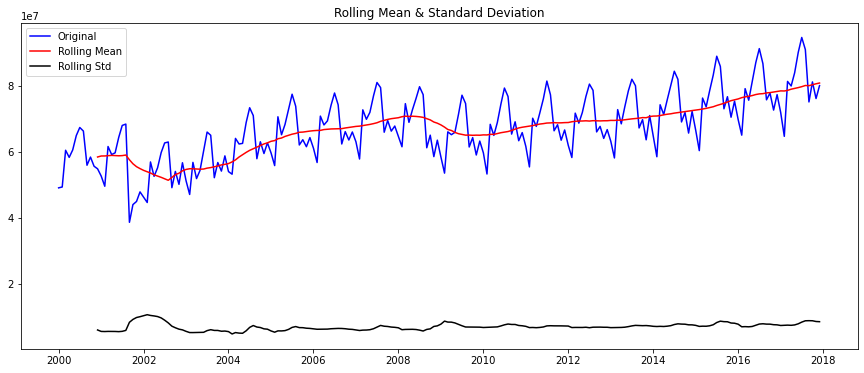

Results of Dickey-Fuller Test:
Test Statistic                  -0.408944
p-value                          0.908595
#Lags Used                      13.000000
Number of Observations Used    202.000000
Critical Value (1%)             -3.463144
Critical Value (5%)             -2.875957
Critical Value (10%)            -2.574455
dtype: float64


In [25]:
test_stationarity(train)

In [26]:
#series is not stationary as mean is increasing even though the std.
#pvalue> 0.05 hence H0 accepted that the series is nonstationary

In [27]:
#the series is nonstationary

In [28]:
diff1=train.diff()        
diff1=diff1.dropna()

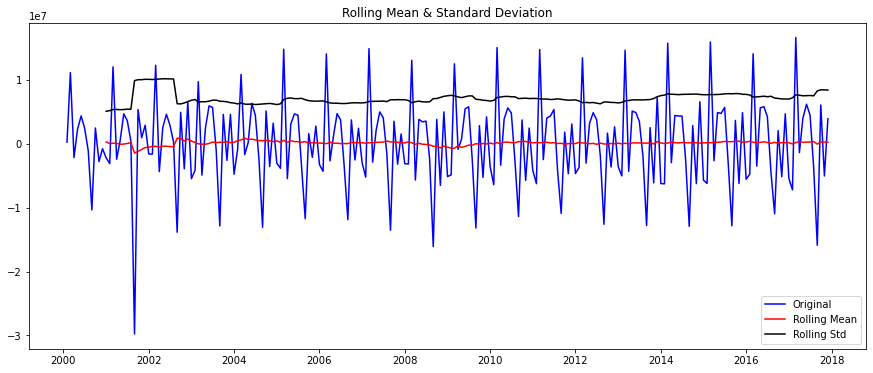

Results of Dickey-Fuller Test:
Test Statistic                  -3.746833
p-value                          0.003501
#Lags Used                      12.000000
Number of Observations Used    202.000000
Critical Value (1%)             -3.463144
Critical Value (5%)             -2.875957
Critical Value (10%)            -2.574455
dtype: float64


In [29]:
test_stationarity(diff1)

In [30]:
#the series is stationary
# d=1

In [31]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

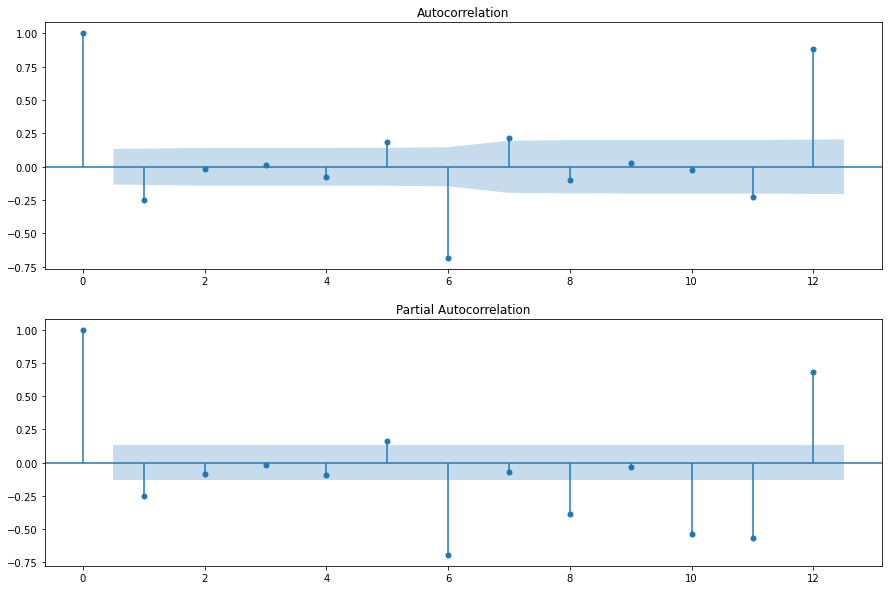

In [32]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [33]:
# p=1 and q=1 and d=1  acc to acf and pacf

# Modelling using Auto-arima

In [34]:
from pmdarima import auto_arima

In [35]:
model = auto_arima(train,seasonal=True,m=12,
                   start_p=0,
                   start_d=0,
                   start_q=0,
                   max_p=5,
                   max_d=2,
                   max_q=5,
                   start_D=0,
                   start_P=0,
                   start_Q=0,
                   max_P=2,
                   max_D=2,
                   max_Q=2,
                   trace=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6756.118, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6670.541, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6671.275, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6778.568, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6713.380, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6669.396, Time=0.48 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=6655.551, Time=0.93 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=6666.361, Time=0.28 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=6650.669, Time=1.03 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=6667.904, Time=0.47 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=6666.093, Time=0.15 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=6732.874, Time=0.80 sec
 ARIMA(2,0,0)(1,1,2)[12] intercept   : AIC=6653.828, Time=1.09 sec
 ARIMA(1,0,1)(1,1,2)[12]

ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

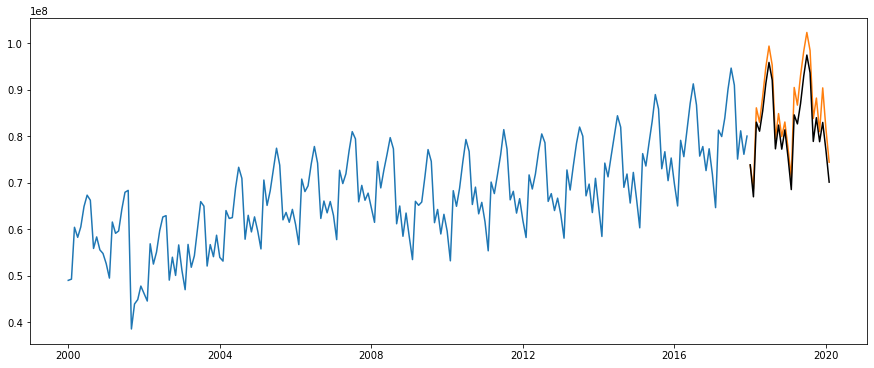

In [36]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [37]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  216
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -3315.718
Date:                              Sun, 08 Aug 2021   AIC                           6643.437
Time:                                      19:42:05   BIC                           6663.346
Sample:                                           0   HQIC                          6651.490
                                              - 216                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.466e+05   1.46e-08   1.69e+13      0.000    2.47e+05    2.47e+05
ar.L1          0.84

# Modelling with SARIMA

In [38]:
import statsmodels.api as sm

In [39]:
model = sm.tsa.SARIMAX(train, order=(1, 0, 2), seasonal_order=(0, 1, 1, 12))

C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASHANT_KULKARNI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [40]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Total   No. Observations:                  216
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -3335.232
Date:                              Sun, 08 Aug 2021   AIC                           6680.465
Time:                                      19:42:16   BIC                           6697.055
Sample:                                  01-01-2000   HQIC                          6687.176
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7985      0.040     19.931      0.000       0.720       0.877
ma.L1         -0.38

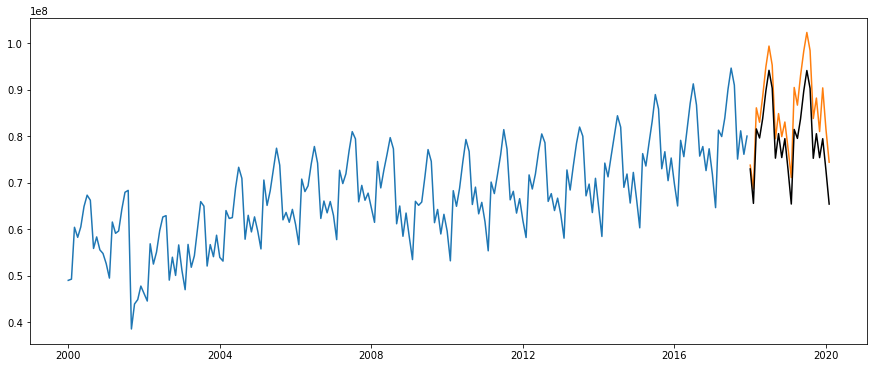

In [41]:
forecast = model_fit.forecast(steps=26)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

6138407.610478067


# GridSearch for parameter tuning

In [44]:
import itertools
import warnings

In [45]:
# Define the p, d and q parameters to take any value between 0 and 2
p = range(1,3)
d = range(1,3)
q = range(1,3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [46]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.SARIMAX(train,
                                order=param,
                                seasonal_order=param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)

ARIMA(1, 1, 1) x (1, 1, 1, 12) - AIC: 5990.025293845345
ARIMA(1, 1, 1) x (1, 1, 2, 12) - AIC: 5589.021946042285
ARIMA(1, 1, 1) x (1, 2, 1, 12) - AIC: 5733.348927532382
ARIMA(1, 1, 1) x (1, 2, 2, 12) - AIC: 5341.703147624653
ARIMA(1, 1, 1) x (2, 1, 1, 12) - AIC: 5620.707207920351
ARIMA(1, 1, 1) x (2, 1, 2, 12) - AIC: 5589.764756719386
ARIMA(1, 1, 1) x (2, 2, 1, 12) - AIC: 5374.0218450637385
ARIMA(1, 1, 1) x (2, 2, 2, 12) - AIC: 5343.686610586797
ARIMA(1, 1, 2) x (1, 1, 1, 12) - AIC: 5926.778436504843
ARIMA(1, 1, 2) x (1, 1, 2, 12) - AIC: 5517.842702633019
ARIMA(1, 1, 2) x (1, 2, 1, 12) - AIC: 5626.970190812376
ARIMA(1, 1, 2) x (1, 2, 2, 12) - AIC: 5235.707534173873
ARIMA(1, 1, 2) x (2, 1, 1, 12) - AIC: 5581.345664267141
ARIMA(1, 1, 2) x (2, 1, 2, 12) - AIC: 5517.825877355359
ARIMA(1, 1, 2) x (2, 2, 1, 12) - AIC: 5300.627893761559
ARIMA(1, 1, 2) x (2, 2, 2, 12) - AIC: 5237.661418391358
ARIMA(1, 2, 1) x (1, 1, 1, 12) - AIC: 5991.668955972136
ARIMA(1, 2, 1) x (1, 1, 2, 12) - AIC: 5594.1632

In [47]:
model = sm.tsa.SARIMAX(train, order=(1, 1, 2), seasonal_order=(1, 2, 2, 12))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                  216
Model:             SARIMAX(1, 1, 2)x(1, 2, 2, 12)   Log Likelihood               -3085.302
Date:                            Sun, 08 Aug 2021   AIC                           6184.603
Time:                                    19:44:18   BIC                           6207.369
Sample:                                01-01-2000   HQIC                          6193.824
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9511      0.117     -8.106      0.000      -1.181      -0.721
ma.L1          0.6681      0.216   

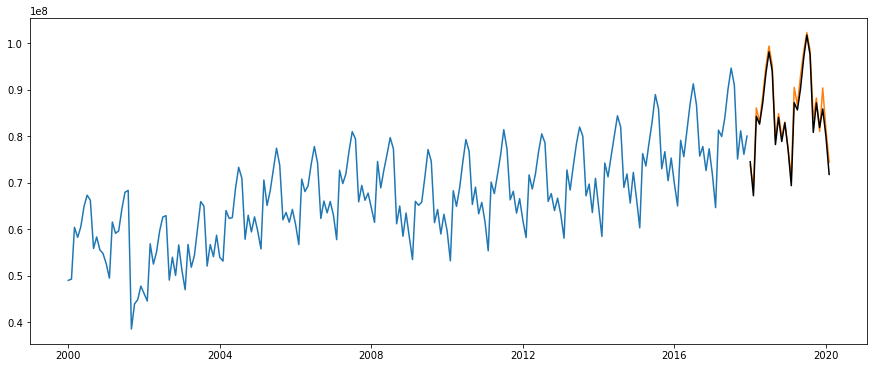

In [48]:
forecast = model_fit.forecast(steps=26)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [49]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

1479584.644998152
